In [ ]:
!pip install -U scikit-learn==1.6.0 numpy==2.1.1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q xgboost imbalanced-learn tensorflow shap joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 119.3 MB/s eta 0:00:00


In [2]:
DATA_PATH = "/content/drive/MyDrive/creditcard.csv"

In [3]:
import pandas as pd
df = pd.read_csv(DATA_PATH)
fraud_sample = df[df["Class"] == 1].iloc[0]
fraud_sample

,541
Time,406.000000
V1,-2.312227
V2,1.951992
V3,-1.609851
V4,3.997906
V5,-0.522188
V6,-1.426545
V7,-2.537387
V8,1.391657
V9,-2.770089


In [ ]:
import pandas as pd
df = pd.read_csv(DATA_PATH)
print("Rows,Cols:", df.shape)

Rows,Cols: (284807, 31)


In [ ]:
print(df.columns.tolist())
display(df.head())
display(df.Class.value_counts(normalize=True).rename("proportion"))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,proportion
Class,
0,0.998273
1,0.001727


/tmp/ipython-input-952683742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette=["#4C72B0", "#DD8452"], ax=ax, legend=False)


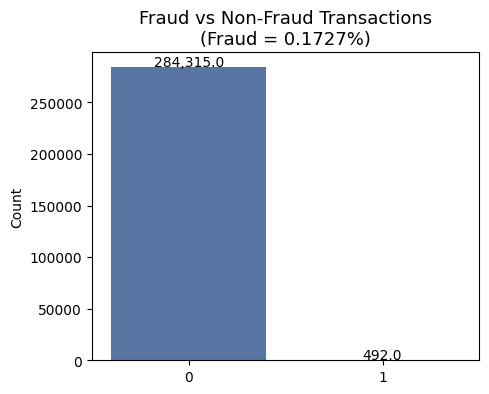

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#CLASS DISTRIBUTION
fraud_ratio = df['Class'].mean() * 100

fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="Class", data=df, palette=["#4C72B0", "#DD8452"], ax=ax, legend=False)
plt.title(f"Fraud vs Non-Fraud Transactions\n(Fraud = {fraud_ratio:.4f}%)", fontsize=13)
plt.xlabel("")
plt.ylabel("Count")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+500, f"{p.get_height():,}", ha='center', fontsize=10)
plt.show()

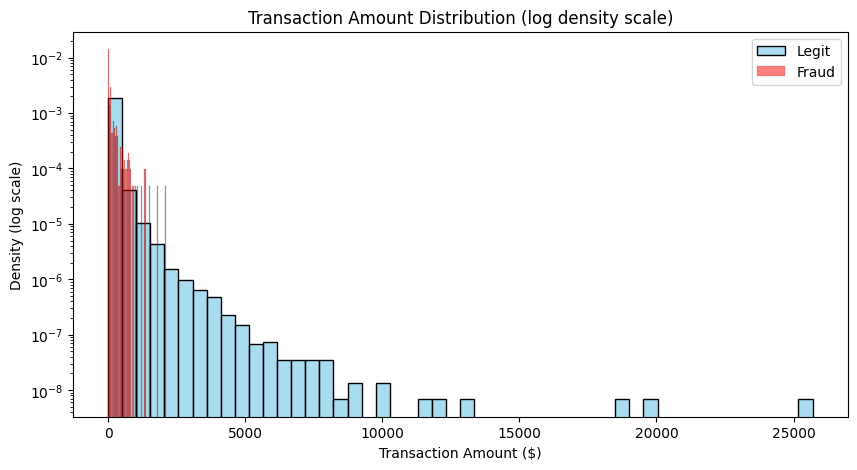

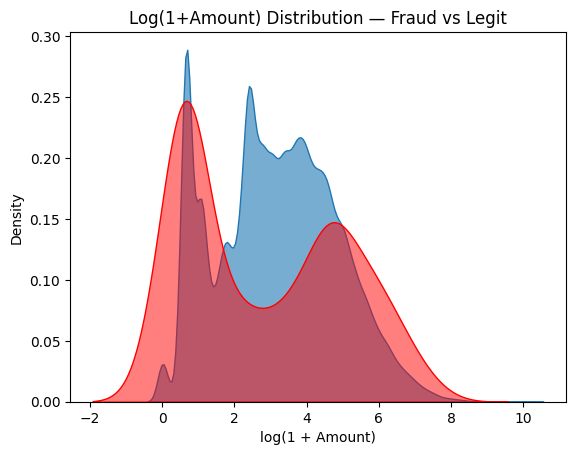

In [ ]:
#AMOUNT DISTRIBUTION
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df[df.Class==0]["Amount"], bins=50, color="skyblue", label="Legit", stat="density", alpha=0.7)
sns.histplot(df[df.Class==1]["Amount"], bins=50, color="red", label="Fraud", stat="density", alpha=0.5)
plt.yscale("log")
plt.title("Transaction Amount Distribution (log density scale)")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Density (log scale)")
plt.legend()
plt.show()

# Log-scale amount
df["Amount_log"] = np.log1p(df["Amount"])
sns.kdeplot(df[df.Class==0]["Amount_log"], label="Legit", fill=True, alpha=0.6)
sns.kdeplot(df[df.Class==1]["Amount_log"], label="Fraud", fill=True, color="red", alpha=0.5)
plt.title("Log(1+Amount) Distribution — Fraud vs Legit")
plt.xlabel("log(1 + Amount)")
plt.show()

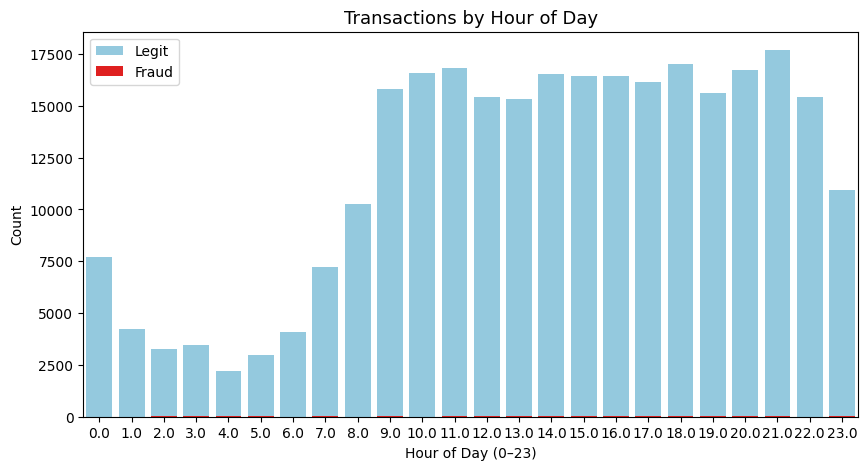

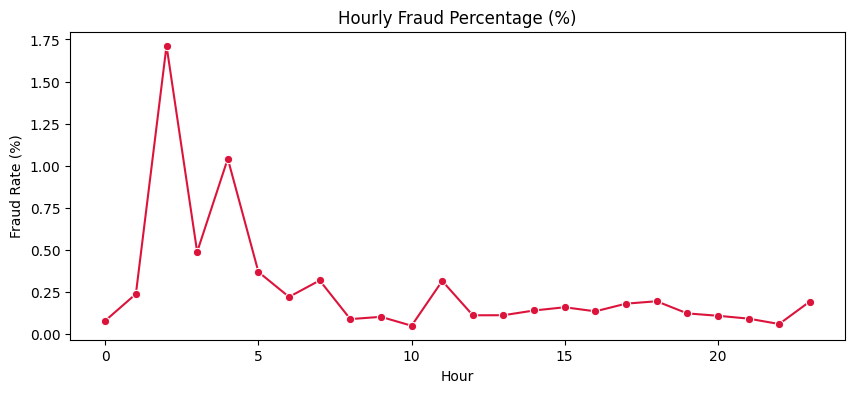

In [ ]:
# TIME PATTERNS
df["Hour"] = (df["Time"] // 3600) % 24

plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df[df["Class"]==0], label="Legit", color="skyblue")
sns.countplot(x="Hour", data=df[df["Class"]==1], label="Fraud", color="red")
plt.title("Transactions by Hour of Day", fontsize=13)
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Count")
plt.legend()
plt.show()

# Normalized hourly rate of fraud
hourly = df.groupby("Hour")["Class"].mean()*100
plt.figure(figsize=(10,4))
sns.lineplot(x=hourly.index, y=hourly.values, marker="o", color="crimson")
plt.title("Hourly Fraud Percentage (%)")
plt.ylabel("Fraud Rate (%)")
plt.show()

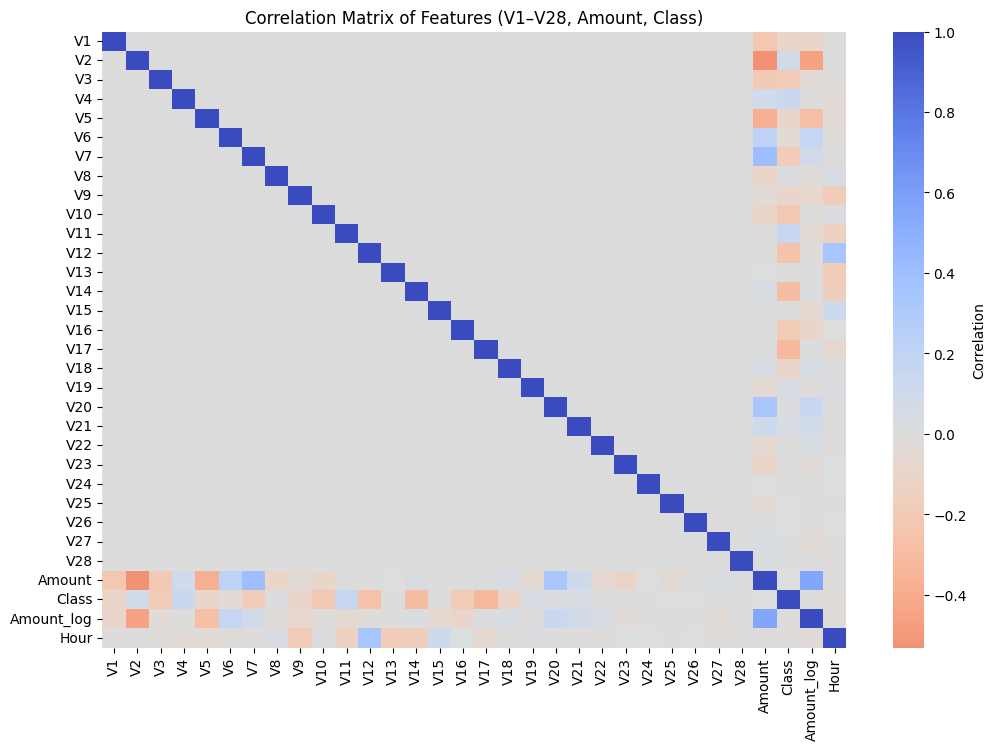

(V11       0.154876
 V4        0.133447
 V2        0.091289
 V21       0.040413
 V19       0.034783
 V20       0.020090
 V8        0.019875
 V27       0.017580
 V28       0.009536
 Amount    0.005632
 Name: Class, dtype: float64,
 V9    -0.097733
 V1    -0.101347
 V18   -0.111485
 V7    -0.187257
 V3    -0.192961
 V16   -0.196539
 V10   -0.216883
 V12   -0.260593
 V14   -0.302544
 V17   -0.326481
 Name: Class, dtype: float64)

In [ ]:
# CORRELATION HEATMAP
corr = df.drop(columns=["Time"]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm_r", center=0, cbar_kws={'label':'Correlation'})
plt.title("Correlation Matrix of Features (V1–V28, Amount, Class)")
plt.show()

# Focus correlation with target
corr_target = corr["Class"].drop("Class").sort_values(ascending=False)
corr_target.head(10), corr_target.tail(10)

/tmp/ipython-input-1972683803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="rocket")


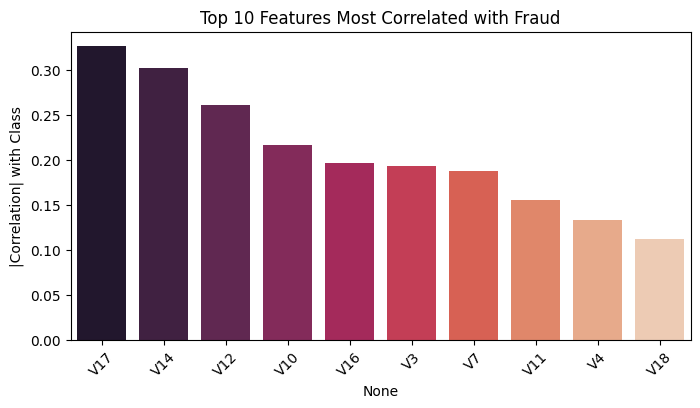

In [ ]:
# TOP FEATURES BY CORRELATION WITH FRAUD
top_features = corr_target.abs().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,4))
sns.barplot(x=top_features.index, y=top_features.values, palette="rocket")
plt.title("Top 10 Features Most Correlated with Fraud")
plt.ylabel("|Correlation| with Class")
plt.xticks(rotation=45)
plt.show()

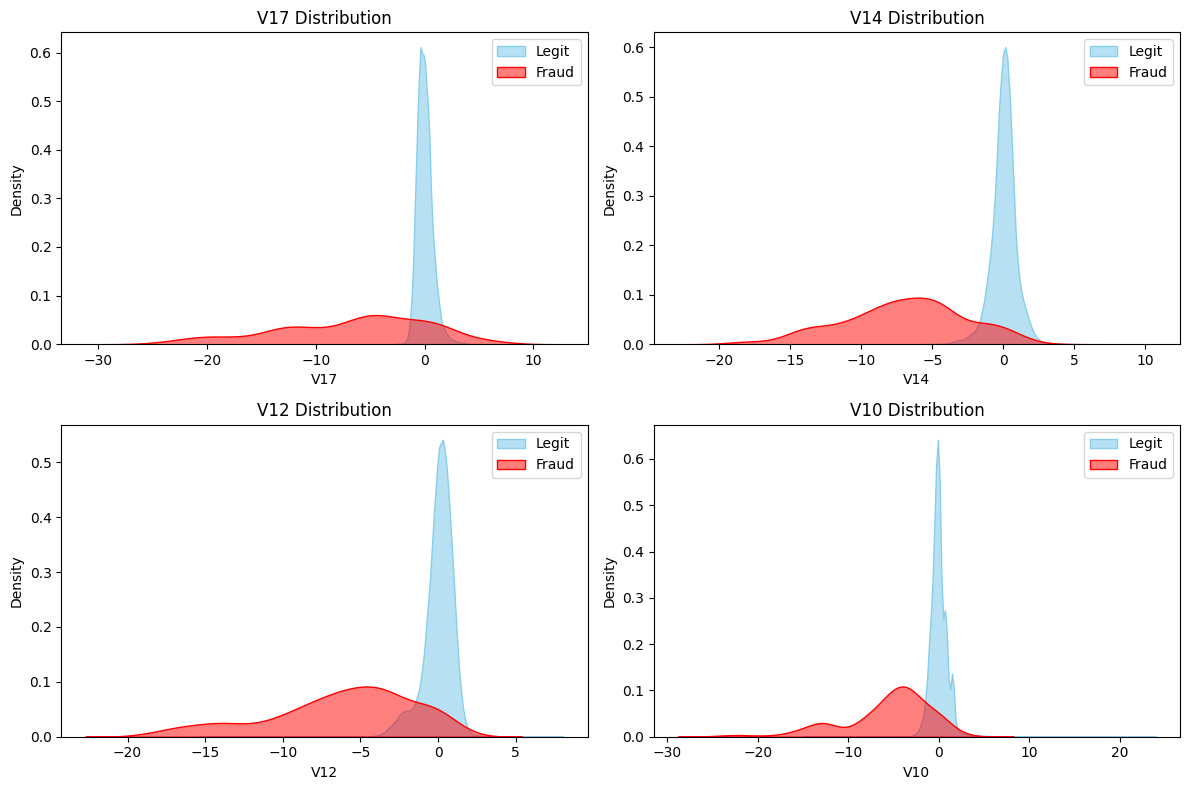

In [ ]:
#FEATURE DISTRIBUTIONS FOR FRAUD VS LEGIT
top_feats = top_features.index[:4]  # pick top 4 features
fig, axes = plt.subplots(2,2, figsize=(12,8))
for ax, feat in zip(axes.flatten(), top_feats):
    sns.kdeplot(df[df.Class==0][feat], fill=True, ax=ax, label="Legit", color="skyblue", alpha=0.6)
    sns.kdeplot(df[df.Class==1][feat], fill=True, ax=ax, label="Fraud", color="red", alpha=0.5)
    ax.set_title(f"{feat} Distribution")
    ax.legend()
plt.tight_layout()
plt.show()

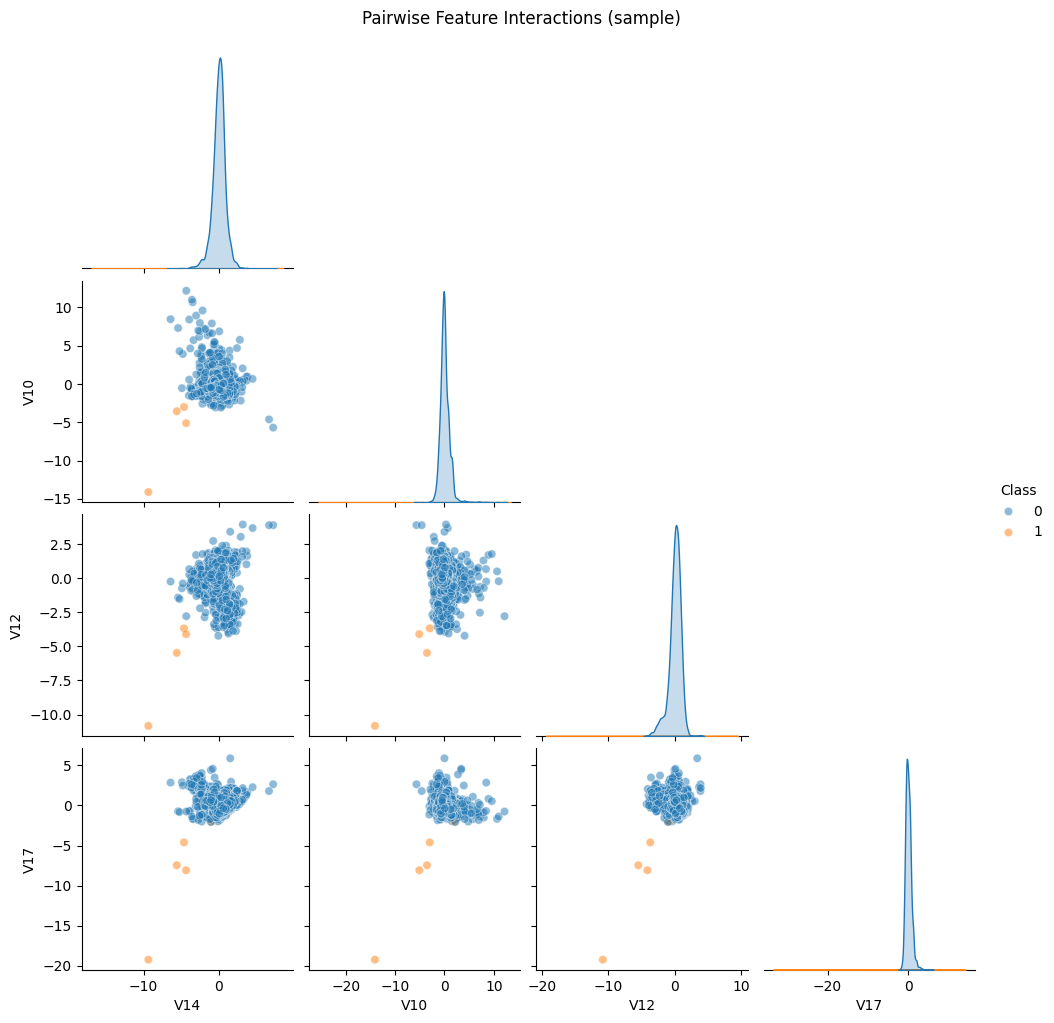

In [ ]:
# PAIRPLOT SAMPLE (small subset)
sample_df = df.sample(5000, random_state=42)
sns.pairplot(sample_df, vars=["V14","V10","V12","V17"], hue="Class", corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Feature Interactions (sample)", y=1.02)
plt.show()

/tmp/ipython-input-1963942920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=df, showfliers=False, palette=["#4C72B0","#DD8452"])


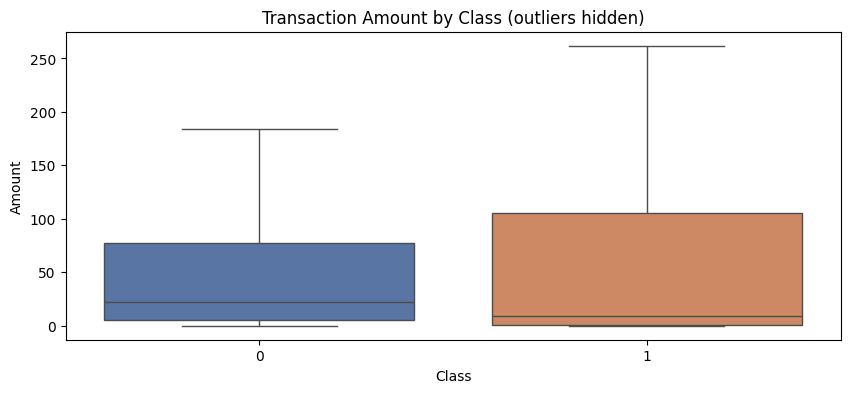

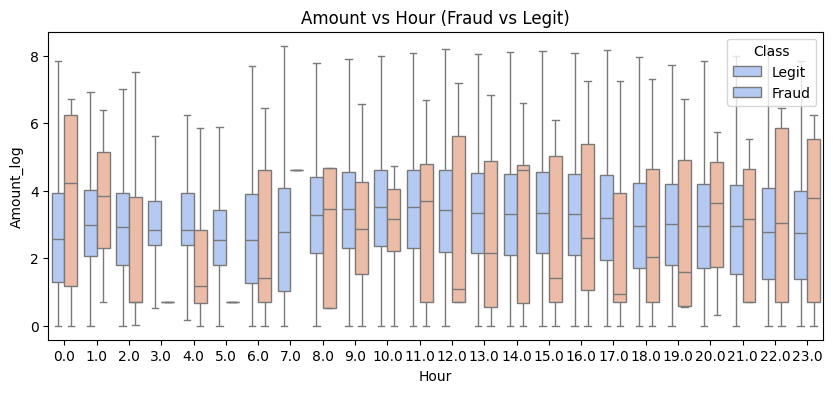

In [ ]:
#  BOX PLOTS
plt.figure(figsize=(10,4))
sns.boxplot(x="Class", y="Amount", data=df, showfliers=False, palette=["#4C72B0","#DD8452"])
plt.title("Transaction Amount by Class (outliers hidden)")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x="Hour", y="Amount_log", hue="Class", data=df, palette="coolwarm", showfliers=False)
plt.title("Amount vs Hour (Fraud vs Legit)")
plt.legend(title="Class", labels=["Legit","Fraud"])
plt.show()

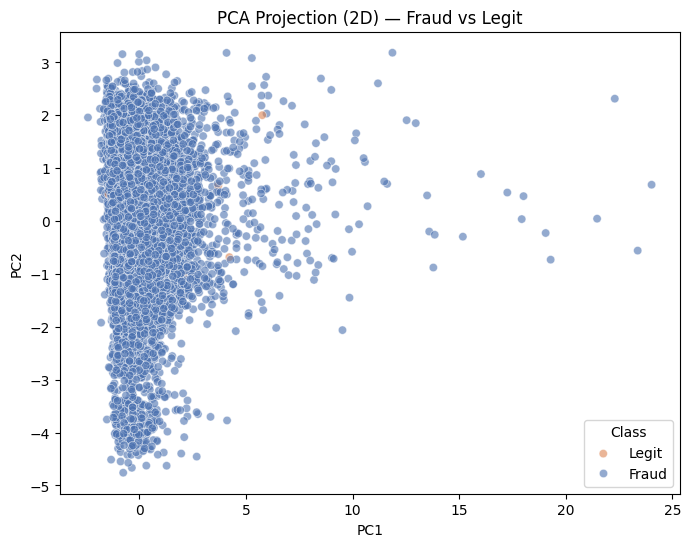

In [ ]:
#PCA 2D VISUALIZATION
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Class"]))

pca = PCA(n_components=2, random_state=42)
pca_points = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_points, columns=["PC1","PC2"])
pca_df["Class"] = df["Class"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df.sample(10000, random_state=42), x="PC1", y="PC2",
                hue="Class", palette=["#4C72B0","#DD8452"], alpha=0.6)
plt.title("PCA Projection (2D) — Fraud vs Legit")
plt.legend(title="Class", labels=["Legit","Fraud"])
plt.show()

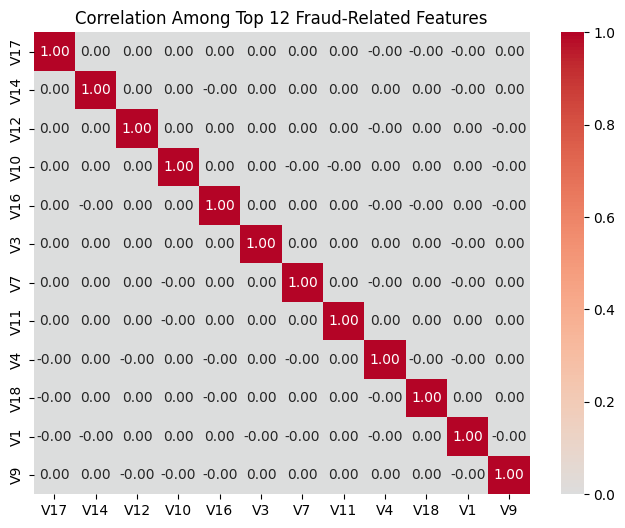

In [ ]:
# COMPACT HEATMAP(Top 12 Features only)
top12 = corr_target.abs().sort_values(ascending=False)[:12].index
plt.figure(figsize=(8,6))
sns.heatmap(df[top12].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Among Top 12 Fraud-Related Features")
plt.show()

In [ ]:
#SUMMARY KPIS
total_txn = len(df)
fraud_txn = df['Class'].sum()
avg_amt_legit = df.loc[df.Class==0, 'Amount'].mean()
avg_amt_fraud = df.loc[df.Class==1, 'Amount'].mean()

print(f"📊 Total Transactions: {total_txn:,}")
print(f"🚨 Fraud Transactions: {fraud_txn:,} ({fraud_ratio:.4f}%)")
print(f"💰 Avg Amount (Legit): ${avg_amt_legit:.2f}")
print(f"💸 Avg Amount (Fraud): ${avg_amt_fraud:.2f}")

📊 Total Transactions: 284,807
🚨 Fraud Transactions: 492 (0.1727%)
💰 Avg Amount (Legit): $88.29
💸 Avg Amount (Fraud): $122.21


In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Amount", color="Class", nbins=50, log_y=True, title="Interactive Amount Histogram (Plotly)")
fig.show()

fig2 = px.scatter(pca_df.sample(10000, random_state=1), x="PC1", y="PC2", color="Class", title="Interactive PCA Scatter (Plotly)")
fig2.show()

In [ ]:
# FEATURE ENGINEERING
from sklearn.preprocessing import StandardScaler

df = df.copy()

# --- New Features ---
df["Amount_log"] = np.log1p(df["Amount"])
df["Hour"] = (df["Time"] // 3600) % 24

#  Cap extreme values to reduce skew (Winsorize) ---
for col in ["Amount_log"]:
    q_low, q_high = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], q_low, q_high)

# Drop unnecessary columns for modeling
df_model = df.drop(columns=["Time"])

print("Feature engineered shape:", df_model.shape)
df_model.head()

Feature engineered shape: (284807, 32)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,0.0


In [ ]:
#  SPLIT DATA
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=["Class"])
y = df_model["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Fraud ratio (train):", y_train.mean(), "Fraud ratio (test):", y_test.mean())


Train shape: (227845, 31)
Fraud ratio (train): 0.001729245759178389 Fraud ratio (test): 0.0017204452090867595


In [ ]:
# FEATURE SCALING
scaler = StandardScaler()

scaled_cols = X_train.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=scaled_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=scaled_cols, index=X_test.index)

print("Scaled train sample:")
display(X_train_scaled.head())

# Save scaler for inference use later
import joblib, os
os.makedirs("models", exist_ok=True)
joblib.dump(scaler, "models/standard_scaler.joblib")



Scaled train sample:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_log,Hour
265518,0.993379,-0.456037,-0.894052,-0.467284,1.089217,3.024383,-1.194852,0.957057,1.281376,-0.144546,...,0.409563,0.490685,1.141970,-0.670832,-0.807227,0.191912,-0.099106,-0.322494,-0.627702,1.020452
180305,1.038507,-0.029349,-2.018302,0.175133,2.133506,2.478840,-0.001832,0.566704,0.041121,0.262604,...,0.314019,0.056568,1.168583,0.985238,-0.977976,0.006397,-0.211524,-0.339764,-1.075228,-0.694601
42664,-0.506766,0.366065,0.470114,-0.700918,-0.598748,1.470411,-1.786684,-4.227592,0.000064,-1.849641,...,0.150500,-0.695838,-1.540549,1.587269,1.895777,0.094137,0.566426,0.346693,1.231158,-0.523095
198723,1.166419,-0.909447,-0.493095,-1.178149,-1.010692,-0.262292,-1.153123,0.008765,-1.019866,1.617041,...,0.105701,0.331932,-0.888718,-0.532153,-0.336546,0.044738,-0.193183,-0.327360,-0.724267,-0.351590
82325,-0.229485,-0.613041,0.076742,-2.440089,0.518711,-0.109914,0.407186,-0.095161,-0.041449,-0.514215,...,-0.239208,-0.010747,-2.250223,-0.559400,-0.300345,-0.080285,-0.196818,-0.008281,0.802435,0.334431


['models/standard_scaler.joblib']

/tmp/ipython-input-1468889873.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




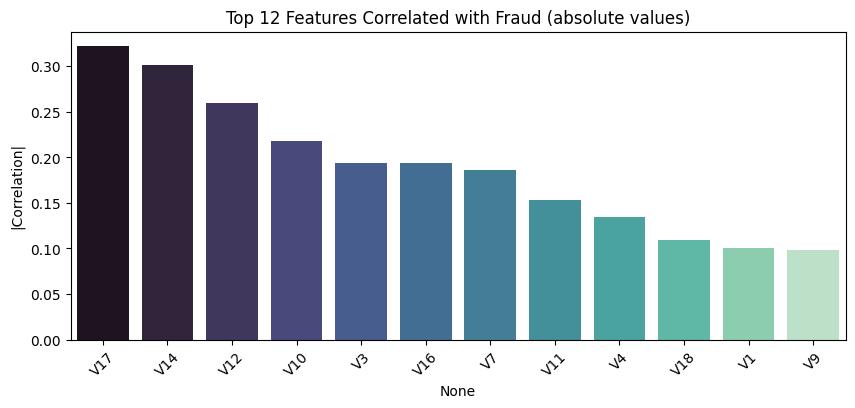

In [ ]:
# FEATURE CORRELATION WITH TARGET
corr_with_target = pd.concat([X_train_scaled, y_train], axis=1).corr()["Class"].drop("Class")
plt.figure(figsize=(10,4))
sns.barplot(x=corr_with_target.abs().sort_values(ascending=False).index[:12],
            y=corr_with_target.abs().sort_values(ascending=False).values[:12],
            palette="mako")
plt.title("Top 12 Features Correlated with Fraud (absolute values)")
plt.ylabel("|Correlation|")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2547666879.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




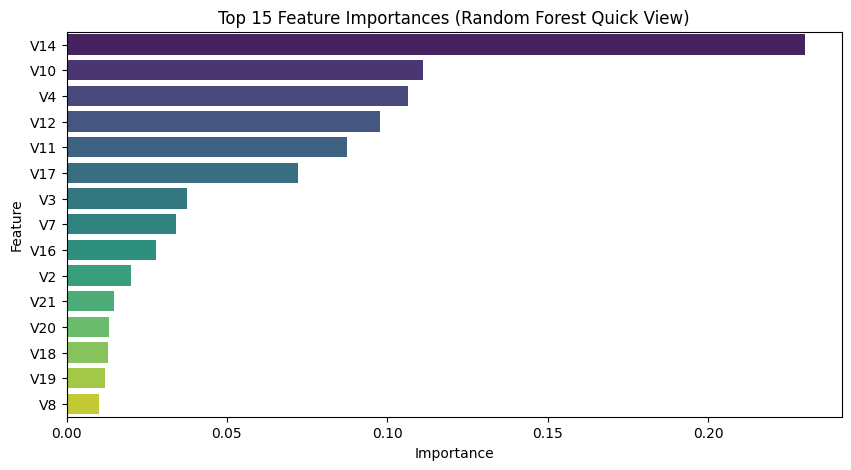

Top 10 important features: ['V14', 'V10', 'V4', 'V12', 'V11', 'V17', 'V3', 'V7', 'V16', 'V2']


In [ ]:
# RANDOM FOREST FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestClassifier

rf_temp = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=42)
rf_temp.fit(X_train_scaled, y_train)

imp = pd.Series(rf_temp.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=imp.head(15), y=imp.head(15).index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest Quick View)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

important_features = imp.head(10).index.tolist()
print("Top 10 important features:", important_features)

In [ ]:
# SMOTE BALANCING
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.1)  # make fraud = 10% of legit
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_bal))


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x783951ebd440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.12/dist-packages/numpy.libs/libscipy_openblas64_-ff651d

Before SMOTE: [227451    394]
After SMOTE : [227451  22745]


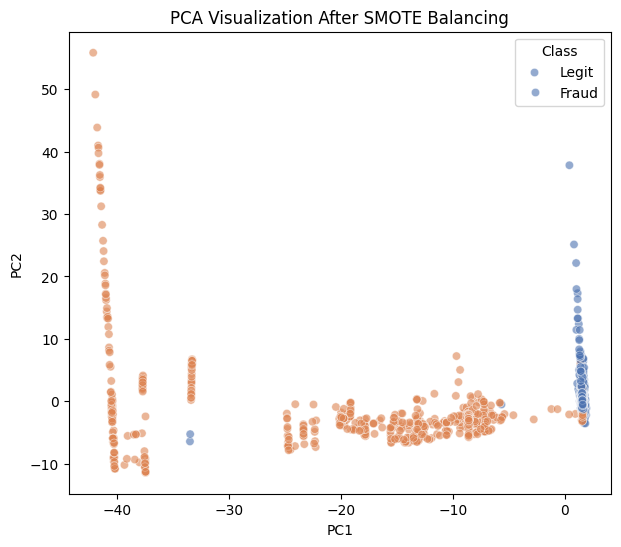

In [ ]:
#  VISUALIZE SMOTE BALANCE
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_points = pca.fit_transform(X_train_bal)
pca_df = pd.DataFrame(pca_points, columns=["PC1","PC2"])
pca_df["Class"] = y_train_bal.values

plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df.sample(10000, random_state=42), x="PC1", y="PC2", hue="Class",
                palette=["#4C72B0","#DD8452"], alpha=0.6)
plt.title("PCA Visualization After SMOTE Balancing")
plt.legend(title="Class", labels=["Legit","Fraud"])
plt.show()


In [ ]:
#  SAVE PROCESSED DATA
train_data = pd.concat([X_train_scaled, y_train], axis=1)
test_data  = pd.concat([X_test_scaled, y_test], axis=1)

train_data.to_csv("processed_train.csv", index=False)
test_data.to_csv("processed_test.csv", index=False)
print("✅ Preprocessing completed — files saved:")
print(" processed_train.csv  →", train_data.shape)
print(" processed_test.csv   →", test_data.shape)


✅ Preprocessing completed — files saved:
 processed_train.csv  → (227845, 32)
 processed_test.csv   → (56962, 32)


In [ ]:
# === LOAD PROCESSED DATA ===
train_data = pd.read_csv("processed_train.csv")
test_data  = pd.read_csv("processed_test.csv")

X_train = train_data.drop(columns=["Class"])
y_train = train_data["Class"]
X_test  = test_data.drop(columns=["Class"])
y_test  = test_data["Class"]

print("Train:", X_train.shape, " Test:", X_test.shape)
print("Fraud rate (train):", y_train.mean(), "Fraud rate (test):", y_test.mean())


Train: (227845, 31)  Test: (56962, 31)
Fraud rate (train): 0.001729245759178389 Fraud rate (test): 0.0017204452090867595


In [ ]:
# === EVALUATION FUNCTION ===
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc  = average_precision_score(y_test, y_proba)
    print(f"\n{name} Results:")
    print("="*50)
    print(classification_report(y_test, y_pred, digits=4))
    print(f"ROC-AUC: {roc_auc:.4f} | PR-AUC: {pr_auc:.4f}")
    return y_pred, y_proba, roc_auc, pr_auc


In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

lr = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr, y_proba_lr, auc_lr, ap_lr = evaluate_model(lr, X_test, y_test, "Logistic Regression")
# plot_confusion(y_test, y_pred_lr, "Confusion Matrix — Logistic Regression")


Logistic Regression Results:
              precision    recall  f1-score   support

           0     0.9998    0.9738    0.9867     56864
           1     0.0564    0.9082    0.1062        98

    accuracy                         0.9737     56962
   macro avg     0.5281    0.9410    0.5464     56962
weighted avg     0.9982    0.9737    0.9851     56962

ROC-AUC: 0.9716 | PR-AUC: 0.7201



Decision Tree Results:
              precision    recall  f1-score   support

           0     0.9997    0.9807    0.9901     56864
           1     0.0694    0.8367    0.1282        98

    accuracy                         0.9804     56962
   macro avg     0.5346    0.9087    0.5592     56962
weighted avg     0.9981    0.9804    0.9886     56962

ROC-AUC: 0.9130 | PR-AUC: 0.4702


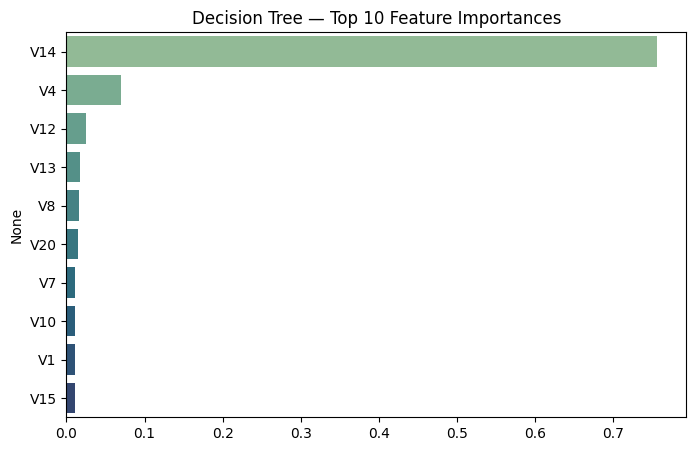

In [ ]:
# === DECISION TREE ===
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=4,
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train, y_train)

y_pred_dt, y_proba_dt, auc_dt, pr_dt = evaluate_model(dt, X_test, y_test, "Decision Tree")

plt.figure(figsize=(8,5))
imp = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:10]
sns.barplot(x=imp.values, y=imp.index, palette="crest", hue=imp.index, legend=False)
plt.title("Decision Tree — Top 10 Feature Importances")
plt.show()


Random Forest Results:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8404    0.8061    0.8229        98

    accuracy                         0.9994     56962
   macro avg     0.9200    0.9029    0.9113     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC: 0.9829 | PR-AUC: 0.8387


/tmp/ipython-input-3870930568.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




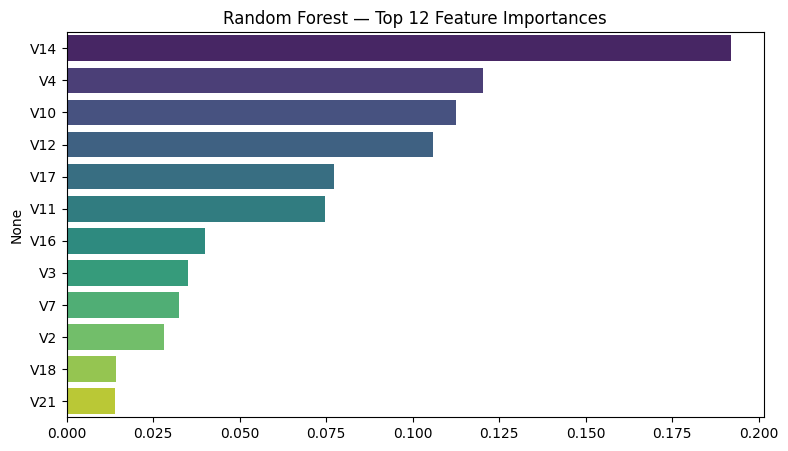

In [ ]:
# === RANDOM FOREST ===
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf, y_proba_rf, auc_rf, pr_rf = evaluate_model(rf, X_test, y_test, "Random Forest")

plt.figure(figsize=(9,5))
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:12]
sns.barplot(x=imp.values, y=imp.index, palette="viridis")
plt.title("Random Forest — Top 12 Feature Importances")
plt.show()

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7675
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

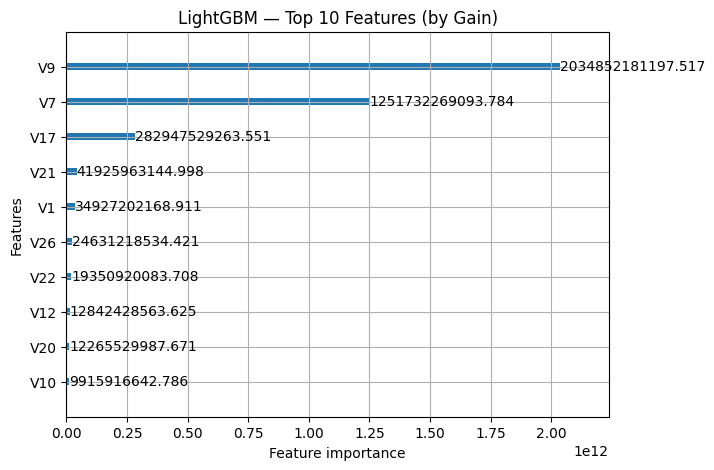

In [ ]:
# === LIGHTGBM ===
import lightgbm as lgb

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=32,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc')

y_pred_lgb, y_proba_lgb, auc_lgb, pr_lgb = evaluate_model(lgbm, X_test, y_test, "LightGBM")

ax = lgb.plot_importance(lgbm, max_num_features=10, importance_type='gain', figsize=(7,5))
plt.title("LightGBM — Top 10 Features (by Gain)")
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[14:51:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Results:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8723    0.8367    0.8542        98

    accuracy                         0.9995     56962
   macro avg     0.9360    0.9183    0.9270     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.9823 | PR-AUC: 0.8806


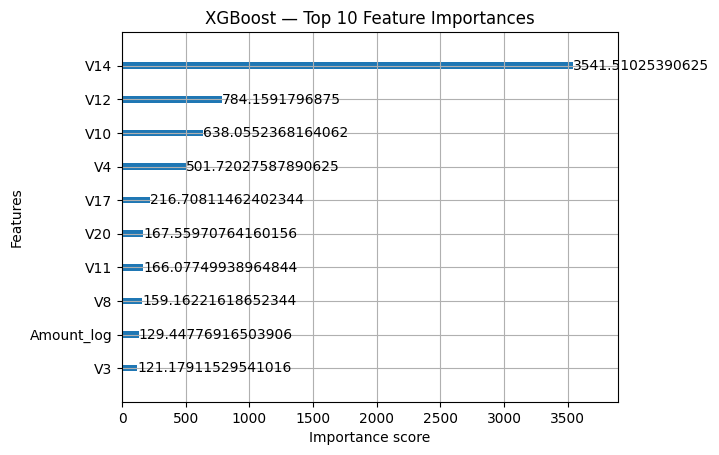

In [ ]:
# === XGBOOST ===
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_clf = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)
xgb_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb, y_proba_xgb, auc_xgb, pr_xgb = evaluate_model(xgb_clf, X_test, y_test, "XGBoost")

xgb.plot_importance(xgb_clf, max_num_features=10, importance_type='gain', title="XGBoost — Top 10 Feature Importances")
plt.show()

In [ ]:
# === EXTRA TREES ===
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=400,
    max_depth=12,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
et.fit(X_train, y_train)

y_pred_et, y_proba_et, auc_et, pr_et = evaluate_model(et, X_test, y_test, "Extra Trees")


Extra Trees Results:
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7265    0.8673    0.7907        98

    accuracy                         0.9992     56962
   macro avg     0.8631    0.9334    0.8952     56962
weighted avg     0.9993    0.9992    0.9992     56962

ROC-AUC: 0.9830 | PR-AUC: 0.8649


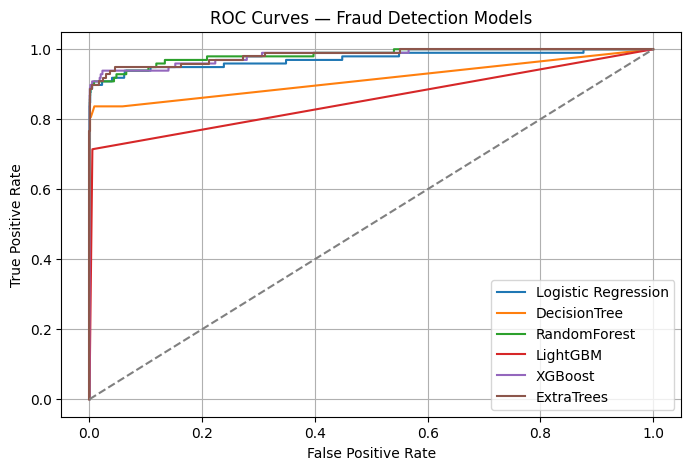

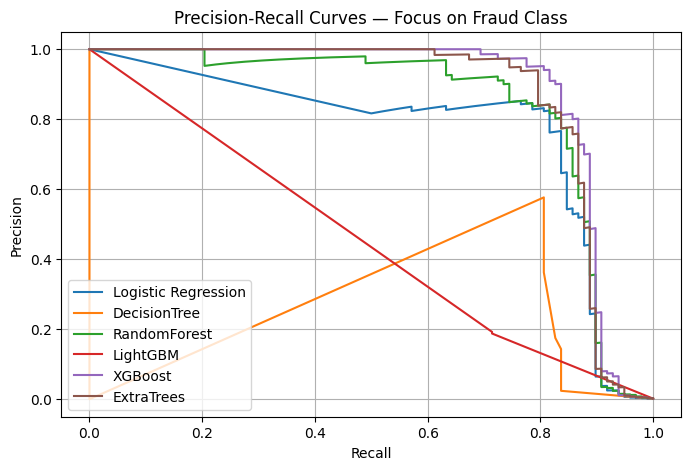

In [ ]:
# === ROC & PRECISION-RECALL CURVES ===
from sklearn.metrics import roc_curve, precision_recall_curve

plt.figure(figsize=(8,5))
for name, y_proba in {
    "Logistic Regression" : y_proba_lr,
    "DecisionTree": y_proba_dt,
    "RandomForest": y_proba_rf,
    "LightGBM": y_proba_lgb,
    "XGBoost": y_proba_xgb,
    "ExtraTrees": y_proba_et
}.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curves — Fraud Detection Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
for name, y_proba in {
    "Logistic Regression" : y_proba_lr,
    "DecisionTree": y_proba_dt,
    "RandomForest": y_proba_rf,
    "LightGBM": y_proba_lgb,
    "XGBoost": y_proba_xgb,
    "ExtraTrees": y_proba_et
}.items():
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f"{name}")
plt.title("Precision-Recall Curves — Focus on Fraud Class")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

,Model,ROC-AUC,PR-AUC
4,XGBoost,0.982269,0.880570
5,ExtraTrees,0.982955,0.864882
2,RandomForest,0.982858,0.838732
0,Logistic Regression,0.971629,0.720120
1,DecisionTree,0.912990,0.470158
3,LightGBM,0.854535,0.137854


/tmp/ipython-input-2664054847.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




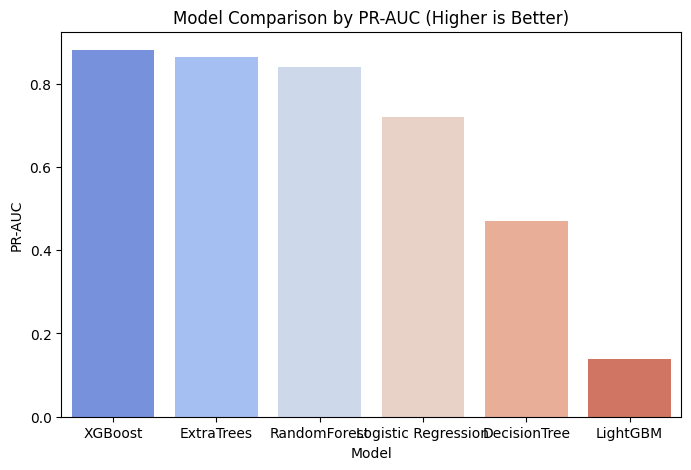

In [ ]:
# === MODEL PERFORMANCE SUMMARY ===
summary = pd.DataFrame({
    "Model": ["Logistic Regression","DecisionTree","RandomForest","LightGBM","XGBoost","ExtraTrees"],
    "ROC-AUC": [auc_lr, auc_dt, auc_rf, auc_lgb, auc_xgb, auc_et],
    "PR-AUC":  [ap_lr, pr_dt, pr_rf, pr_lgb, pr_xgb, pr_et]
}).sort_values(by="PR-AUC", ascending=False)

display(summary)

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="PR-AUC", data=summary, palette="coolwarm")
plt.title("Model Comparison by PR-AUC (Higher is Better)")
plt.show()

IsolationForest ROC-AUC: 0.9513 | PR-AUC: 0.1175


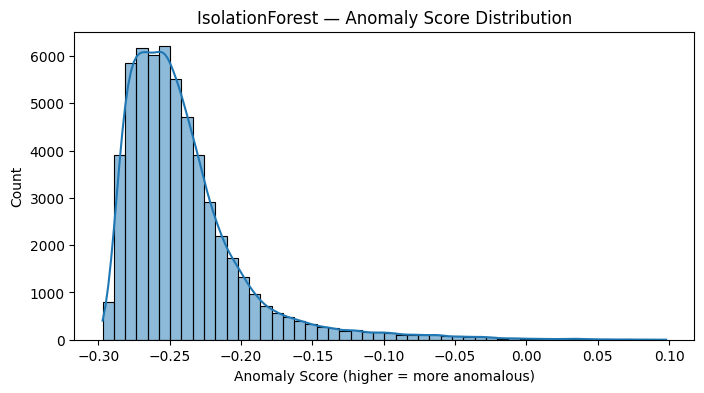

In [ ]:
# === ISOLATION FOREST ===
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


iso = IsolationForest(
    n_estimators=400,
    contamination=0.0015,   # estimated fraud ratio
    random_state=42,
    n_jobs=-1
)
# Train only on non-fraud (normal) samples
iso.fit(X_train[y_train == 0])

# Score all test samples (higher score → more anomalous)
iso_scores = -iso.decision_function(X_test)
iso_auc = roc_auc_score(y_test, iso_scores)
iso_pr  = average_precision_score(y_test, iso_scores)

print(f"IsolationForest ROC-AUC: {iso_auc:.4f} | PR-AUC: {iso_pr:.4f}")

plt.figure(figsize=(8,4))
sns.histplot(iso_scores, bins=50, kde=True)
plt.title("IsolationForest — Anomaly Score Distribution")
plt.xlabel("Anomaly Score (higher = more anomalous)")
plt.show()

In [ ]:
# === AUTOENCODER ===
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

X_train_normal = X_train[y_train == 0].values.astype('float32')
X_test_np = X_test.values.astype('float32')

input_dim = X_train.shape[1]
latent_dim = 16

autoenc = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(latent_dim, activation='relu', name='bottleneck'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoenc.compile(optimizer='adam', loss='mse')

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = autoenc.fit(
    X_train_normal, X_train_normal,
    epochs=50, batch_size=1024, callbacks=[early_stop],
    validation_split=0.2 # Added validation split for early stopping
)

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.8277 - val_loss: 0.4626
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4085 - val_loss: 0.3169
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2856 - val_loss: 0.2295
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2198 - val_loss: 0.1875
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1789 - val_loss: 0.1583
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1547 - val_loss: 0.1361
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1332 - val_loss: 0.1210
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1162 - val_loss: 0.1153
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1100 - val_loss: 0.1025
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0990 - val_loss: 0.1045
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0983 - val_loss: 0.0914
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

In [ ]:
# === THRESHOLD OPTIMIZATION FOR UNSUPERVISED ===
def threshold_eval(scores, true_labels, model_name):
    precision, recall, thresholds = precision_recall_curve(true_labels, scores)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1)
    best_thresh = thresholds[best_idx]
    print(f"{model_name} best threshold: {best_thresh:.5f}")
    print(f"Precision: {precision[best_idx]:.3f} | Recall: {recall[best_idx]:.3f} | F1: {f1[best_idx]:.3f}")
    return best_thresh, f1[best_idx]

# Calculate reconstruction error for Autoencoder
reconstructions = autoenc.predict(X_test_np)
recon_err = np.mean(np.square(X_test_np - reconstructions), axis=1)

iso_thresh, iso_f1 = threshold_eval(iso_scores, y_test, "IsolationForest")
ae_thresh, ae_f1   = threshold_eval(recon_err, y_test, "Autoencoder")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
IsolationForest best threshold: -0.00621
Precision: 0.231 | Recall: 0.306 | F1: 0.263
Autoencoder best threshold: 1.29157
Precision: 0.550 | Recall: 0.673 | F1: 0.606


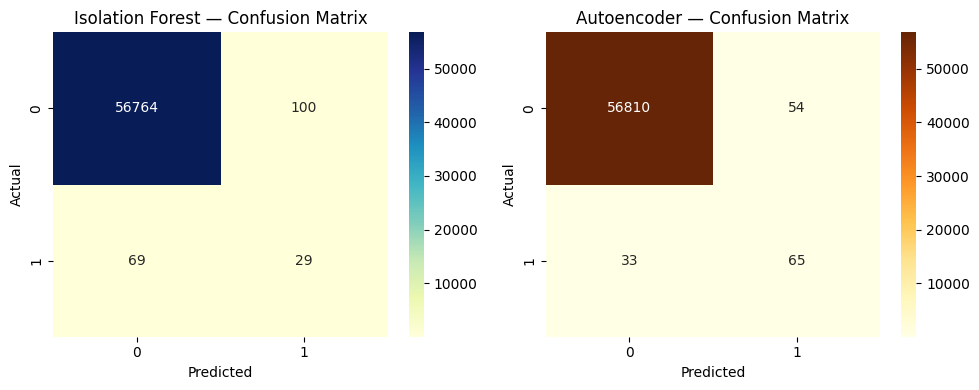

In [ ]:
# Predicted labels based on thresholds
from sklearn.metrics import confusion_matrix

y_pred_iso = (iso_scores > iso_thresh).astype(int)
y_pred_ae  = (recon_err > ae_thresh).astype(int)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_iso), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Isolation Forest — Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_ae), annot=True, fmt="d", cmap="YlOrBr")
plt.title("Autoencoder — Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout()
plt.show()

,Model,ROC-AUC,PR-AUC
4,XGBoost,0.982269,0.880570
5,ExtraTrees,0.982955,0.864882
2,RandomForest,0.982858,0.838732
0,Logistic Regression,0.971629,0.720120
7,Autoencoder,0.959848,0.577922
1,DecisionTree,0.912990,0.470158
3,LightGBM,0.854535,0.137854
6,IsolationForest,0.951275,0.117457


/tmp/ipython-input-2751537944.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




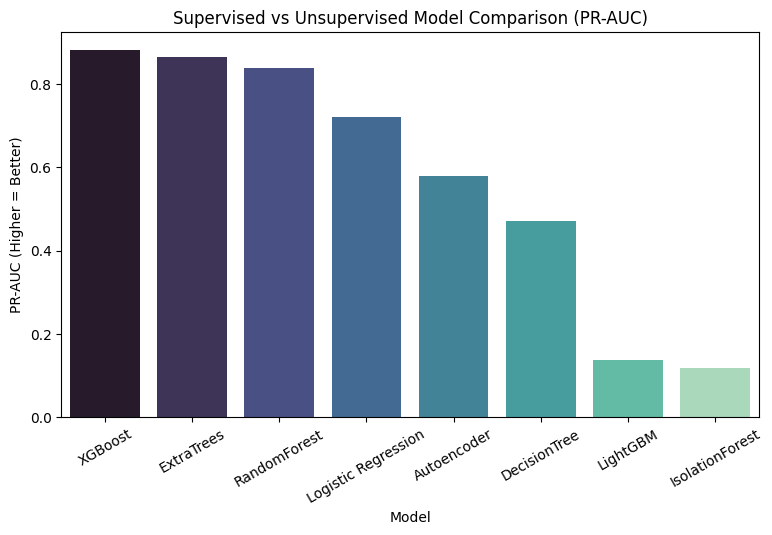

In [ ]:
# === COMPARISON SUMMARY ===
# Calculate AUC for Autoencoder
ae_auc = roc_auc_score(y_test, recon_err)
ae_pr  = average_precision_score(y_test, recon_err)

summary_all = pd.DataFrame({
    "Model": [
        "Logistic Regression","DecisionTree","RandomForest","LightGBM","XGBoost","ExtraTrees",
        "IsolationForest","Autoencoder"
    ],
    "ROC-AUC": [
        auc_lr, auc_dt, auc_rf, auc_lgb, auc_xgb, auc_et,
        iso_auc, ae_auc
    ],
    "PR-AUC": [
        ap_lr, pr_dt, pr_rf, pr_lgb, pr_xgb, pr_et,
        iso_pr, ae_pr
    ]
}).sort_values(by="PR-AUC", ascending=False)

display(summary_all)

plt.figure(figsize=(9,5))
sns.barplot(x="Model", y="PR-AUC", data=summary_all, palette="mako")
plt.title("Supervised vs Unsupervised Model Comparison (PR-AUC)")
plt.ylabel("PR-AUC (Higher = Better)")
plt.xticks(rotation=30)
plt.show()

In [ ]:
#  BUILD TRANSACTION GRAPH
# Graph nodes: customer:customer_id, merchant:merchant_id, card:card_id, device:device_id, location:loc_id
# Graph edges: transaction edges connect customer->merchant, card->merchant, customer->device, customer->location

import networkx as nx # Import networkx

def build_graph_from_df(df):
    G = nx.Graph()
    # helpers to safe-get columns
    def safe_col(c): return c if c in df.columns else None

    # Determine available entity columns
    cust_col = safe_col("customer_id") or safe_col("CustomerID") or safe_col("customer")
    merch_col = safe_col("merchant_id") or safe_col("merchant") or safe_col("Merchant")
    card_col = safe_col("card_id") or safe_col("card") or safe_col("CardNumber")
    device_col = safe_col("device")
    loc_col = safe_col("location") or safe_col("city") or safe_col("geo")

    # If none of the entity columns exist, synthesize pseudo IDs using hashing of some columns
    if cust_col is None:
        print("No customer ID found — synthesizing pseudo_customer by hashing V-features")
        df['pseudo_customer'] = (df[['V1']].fillna(0).astype(str).agg('-'.join, axis=1)).apply(lambda s: "pc_"+str(abs(hash(s))%1000000))
        cust_col = 'pseudo_customer'
    if merch_col is None:
        print("No merchant ID found — synthesizing pseudo_merchant from Amount+Hour cluster")
        if 'Hour' not in df.columns:
            df['Hour'] = (df['Time'] // 3600) % 24 if 'Time' in df.columns else 0
        df['amt_hour_bin'] = pd.cut(df['Amount'], bins=10, labels=False, include_lowest=True).astype(str) + "_" + df['Hour'].astype(str)
        df['pseudo_merchant'] = df['amt_hour_bin'].apply(lambda s: "pm_"+str(abs(hash(s))%1000000))
        merch_col = 'pseudo_merchant'
    if card_col is None:
        df['pseudo_card'] = df.index.to_series().apply(lambda i: "card_"+str(i%10000))
        card_col = 'pseudo_card'
    if device_col is None:
        df['pseudo_device'] = df.index.to_series().apply(lambda i: "dev_"+str(i%500))
        device_col = 'pseudo_device'
    if loc_col is None:
        df['pseudo_loc'] = df.index.to_series().apply(lambda i: "loc_"+str(i%1000))
        loc_col = 'pseudo_loc'

    # iterate transactions and add edges
    for idx, row in df.iterrows():
        c = f"cust_{row[cust_col]}"
        m = f"merch_{row[merch_col]}"
        ca = f"card_{row[card_col]}"
        d = f"dev_{row[device_col]}"
        l = f"loc_{row[loc_col]}"
        tx_node = f"tx_{idx}"   # transaction node (optional)
        # add nodes
        for n, kind in [(c,'customer'), (m,'merchant'), (ca,'card'), (d,'device'), (l,'location'), (tx_node,'transaction')]:
            if not G.has_node(n):
                G.add_node(n, kind=kind)
        # add edges (undirected)
        G.add_edge(c, m, relation='cust-merch')
        G.add_edge(c, ca, relation='cust-card')
        G.add_edge(c, d, relation='cust-dev')
        G.add_edge(c, l, relation='cust-loc')
        G.add_edge(tx_node, c, relation='tx-cust')   # connect tx to entities
        G.add_edge(tx_node, m, relation='tx-merch')
        # attach metadata to transaction node for quick lookup
        G.nodes[tx_node].update({
            'index': idx,
            'amount': float(row.get('Amount', 0)),
            'class': int(row.get('Class', 0)) if 'Class' in row else None
        })
    return G

# Ensure df_orig is defined, if not use the concatenated dataframe
if 'df_orig' not in globals():
    df_orig = pd.concat([train_data, test_data], ignore_index=True).reset_index(drop=True)

G = build_graph_from_df(df_orig)
print("Graph built: nodes:", G.number_of_nodes(), "edges:", G.number_of_edges())

No customer ID found — synthesizing pseudo_customer by hashing V-features
No merchant ID found — synthesizing pseudo_merchant from Amount+Hour cluster
Graph built: nodes: 537261 edges: 1702713


In [ ]:
# =================================
#   FAST GRAPH FEATURE EXTRACTION
# =================================

import networkx as nx
import numpy as np
import pandas as pd


max_tx = 50000          # change to full len(train_data) if offline
if len(train_data) > max_tx:
    sample_idx = np.random.choice(train_data.index, size=max_tx, replace=False)
    sample_df = train_data.loc[sample_idx].copy()
    print(f"Using sampled data: {len(sample_df):,} / {len(train_data):,}")
else:
    sample_df = train_data.copy()

# 🔧 Rebuild graph on sampled data
G = nx.Graph()
for i, row in sample_df.iterrows():
    cust_node = f"cust_{int(row.get('CustomerID', i%10000))}"   # replace with your actual customer ID field if available
    txn_node  = f"txn_{i}"
    G.add_node(cust_node, kind='customer')
    G.add_node(txn_node,  kind='transaction', index=i)
    G.add_edge(cust_node, txn_node)

print(f"Graph built with {G.number_of_nodes():,} nodes and {G.number_of_edges():,} edges.")

# --- Precompute light-weight metrics (fast) ---
degree = dict(G.degree())
# PageRank can still be heavy, so approximate or skip if needed:
try:
    pagerank = nx.pagerank(G, alpha=0.85, max_iter=40)  # reduce max_iter
except Exception as e:
    print("⚠️ Pagerank skipped (too large):", e)
    pagerank = {n: 0 for n in G.nodes()}

# Skip full clustering — instead use degree-based proxy
clustering = {n: min(1.0, degree[n]/10) for n in G.nodes()}

# Precompute component sizes once
comp_sizes = {}
for comp in nx.connected_components(G):
    size = len(comp)
    for node in comp:
        comp_sizes[node] = size

# --- Extract transaction-level features efficiently ---
def extract_tx_graph_features_fast(G):
    records = []
    for n, data in G.nodes(data=True):
        if data.get("kind") == "transaction":
            idx = data["index"]
            neigh = list(G.neighbors(n))
            custs = [nbr for nbr in neigh if G.nodes[nbr]["kind"] == "customer"]
            cust = custs[0] if custs else None
            rec = {
                "index": idx,
                "tx_degree": degree.get(n, 0),
                "tx_pagerank": pagerank.get(n, 0),
                "tx_clustering": clustering.get(n, 0),
                "cust_degree": degree.get(cust, 0) if cust else 0,
                "cust_pagerank": pagerank.get(cust, 0) if cust else 0,
                "cust_clustering": clustering.get(cust, 0) if cust else 0,
                "component_size": comp_sizes.get(n, 1)
            }
            records.append(rec)
    return pd.DataFrame(records).set_index("index")

tx_graph_feats = extract_tx_graph_features_fast(G)
print("Transaction-level graph features shape:", tx_graph_feats.shape)

# --- Merge back with processed data (train+test) ---
full_df = pd.concat([train_data, test_data], ignore_index=True)
full_df = full_df.reset_index().rename(columns={"index":"orig_index"})
full_df = full_df.join(tx_graph_feats, how="left")
full_df[["tx_degree","cust_degree"]] = full_df[["tx_degree","cust_degree"]].fillna(0)

display(full_df[["tx_degree","tx_pagerank","cust_degree","cust_pagerank"]].describe().T)


Using sampled data: 50,000 / 227,845
Graph built with 59,964 nodes and 50,000 edges.
Transaction-level graph features shape: (50000, 7)


,count,mean,std,min,25%,50%,75%,max
tx_degree,284807.0,0.175557,3.804439e-01,0.000000,0.000000,0.000000,0.000000,1.000000
tx_pagerank,50000.0,0.000011,7.085993e-07,0.000010,0.000010,0.000011,0.000011,0.000017
cust_degree,284807.0,1.017306,2.351600e+00,0.000000,0.000000,0.000000,0.000000,13.000000
cust_pagerank,50000.0,0.000052,1.438770e-05,0.000017,0.000039,0.000054,0.000061,0.000105


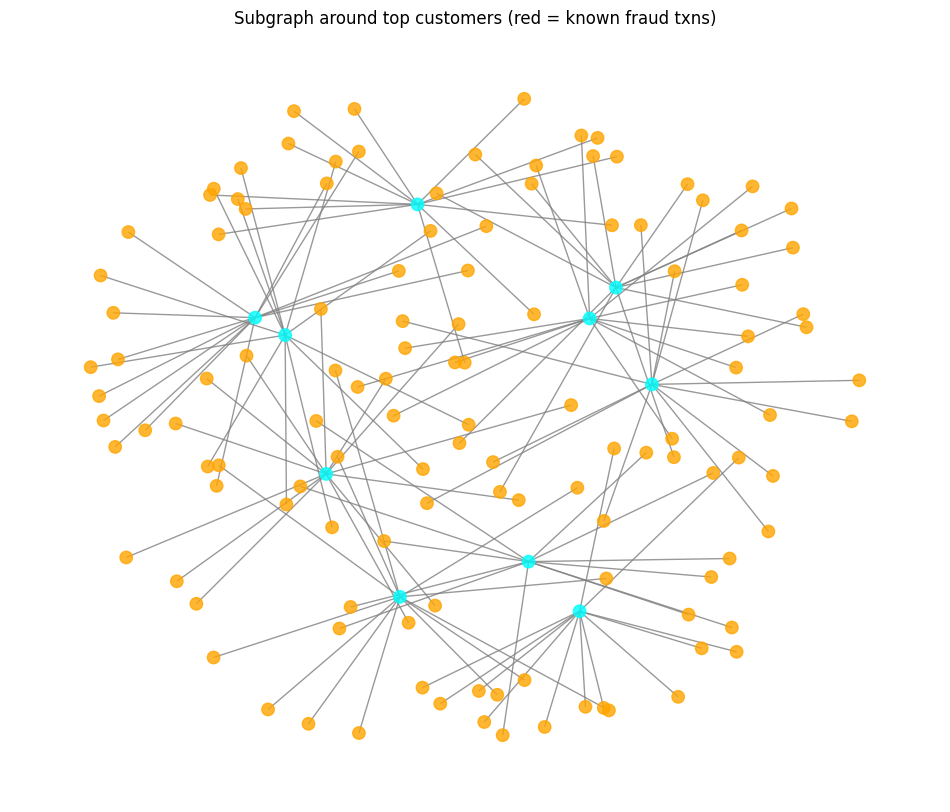

subgraph.html


In [ ]:
# VISUALIZE TOP SUSPICIOUS CUSTOMERS (by cust_degree or pagerank)
# Pick top N customers by cust_degree who also have a high fraud rate
top_custs = sorted([(n, degree[n]) for n in G.nodes() if G.nodes[n]['kind']=='customer'], key=lambda x: -x[1])[:10]
top_nodes = [t[0] for t in top_custs]

# get induced subgraph around these customers (radius 2)
nodes_to_draw = set()
for c in top_nodes:
    nodes_to_draw.add(c)
    for nbr in nx.single_source_shortest_path_length(G, c, cutoff=2).keys():
        nodes_to_draw.add(nbr)

subG = G.subgraph(nodes_to_draw).copy()
plt.figure(figsize=(12,10))
pos = nx.spring_layout(subG, k=0.5, iterations=60)
node_colors = ['red' if subG.nodes[n].get('kind')=='transaction' and subG.nodes[n].get('class')==1 else
               ('orange' if subG.nodes[n].get('kind')=='transaction' else
                ('cyan' if subG.nodes[n].get('kind')=='customer' else 'lightgray'))
               for n in subG.nodes()]
nx.draw_networkx(subG, pos=pos, node_color=node_colors, node_size=80, with_labels=False, edge_color='gray', alpha=0.8)
plt.title("Subgraph around top customers (red = known fraud txns)")
plt.axis('off')
plt.show()

# Optional interactive HTML via pyvis
from pyvis.network import Network

net = Network(height="750px", width="100%", notebook=True)
for n, d in subG.nodes(data=True):
    net.add_node(n, label=n, title=str(d), color=('red' if d.get('kind')=='transaction' and d.get('class')==1 else None))
for u, v, d in subG.edges(data=True):
    net.add_edge(u, v)
display(net.show("subgraph.html"))

In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00


In [ ]:
#  PREP DATA FOR MODELLING (use full_df with graph features)
# Recover train/test splits (we earlier concatenated train/test); we need to split back
n_train = train_data.shape[0]
df_train_with_graph = full_df.iloc[:n_train].copy()
df_test_with_graph  = full_df.iloc[n_train:].copy()

# Add graph features to X_train_scaled / X_test_scaled — ensure same columns order as model expects
# If your trained model expects only the original scaled features, we'll create a new X by concatenation
X_train_orig = df_train_with_graph.drop(columns=['Class'])  # may include graph features
y_train_orig = df_train_with_graph['Class']
X_test_orig  = df_test_with_graph.drop(columns=['Class'])
y_test_orig  = df_test_with_graph['Class']

# Keep numeric subset and fill nan
for df_ in [X_train_orig, X_test_orig]:
    df_['tx_degree'] = df_['tx_degree'].fillna(0)
    df_['cust_degree'] = df_['cust_degree'].fillna(0)
    df_['tx_pagerank'] = df_['tx_pagerank'].fillna(0)
    df_['cust_pagerank'] = df_['cust_pagerank'].fillna(0)

# Choose a simple model to test improvement (LightGBM if available)
if 'lgbm' in globals():
    # create train/test matrices combining existing X + new graph features
    # NOTE: ensure columns used match those seen in training; here we append new features
    features_existing = [c for c in X_train.columns]  # from earlier scope; X_train should be present
    new_feats = ['tx_degree','tx_pagerank','cust_degree','cust_pagerank']
    X_train_enh = pd.concat([X_train.reset_index(drop=True), X_train_orig[new_feats].reset_index(drop=True)], axis=1).fillna(0)
    X_test_enh  = pd.concat([X_test.reset_index(drop=True), X_test_orig[new_feats].reset_index(drop=True)], axis=1).fillna(0)

    # retrain a small LGBM to compare (or score if you saved model that accepts extra features)
    lgbm2 = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=31, random_state=42, n_jobs=-1)
    lgbm2.fit(X_train_enh, y_train, eval_set=[(X_test_enh, y_test)])
    y_proba_baseline = y_proba_lgb  # from previous LightGBM run (if exists)
    y_proba_new = lgbm2.predict_proba(X_test_enh)[:,1]

    print("Baseline LGBM PR-AUC (prev):", average_precision_score(y_test, y_proba_baseline))
    print("Enhanced LGBM PR-AUC (with graph features):", average_precision_score(y_test, y_proba_new))
else:
    print("LightGBM instance not found in this session; skip retrain. You can retrain your chosen model with the new features similarly.")

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7719
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
Baseline LGBM PR-AUC (prev): 0.13785419313666217
Enhanced LGBM PR-AUC (with graph features): 0.8168889565725141


In [ ]:
!pip install confluent-kafka joblib tensorflow pandas numpy
import json, time, numpy as np, pandas as pd, joblib
from confluent_kafka import Producer, Consumer, KafkaError
from tensorflow.keras.models import load_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 62.3 MB/s eta 0:00:00


In [ ]:
# =============================================
# SAVE SCALER + XGBOOST MODEL (COLAB VERSION)
# =============================================
import joblib
from google.colab import files

# ✅ 1. Save trained scaler (if you used StandardScaler or similar)
joblib.dump(scaler, "standard_scaler.joblib")
print("Scaler saved as standard_scaler.joblib")

# ✅ 2. Save trained XGBoost model
joblib.dump(xgb_clf, "fraud_pipeline.joblib")
print("XGBoost model saved as fraud_pipeline.joblib")

# ✅ 3. Download both files to your local system
files.download("standard_scaler.joblib")
files.download("fraud_pipeline.joblib")

Scaler saved as standard_scaler.joblib
XGBoost model saved as fraud_pipeline.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from xgboost import XGBClassifier
import numpy as np
import joblib

# Custom feature engineering function
def add_features(X):
    X = X.copy()
    if "Amount" in X.columns:
        X["Amount_log"] = np.log1p(X["Amount"])
    if "Time" in X.columns and "Hour" not in X.columns:
        X["Hour"] = (X["Time"] // 3600) % 24
    return X

# Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

# Build the full pipeline
pipeline = Pipeline([
    ("feature_engineering", FunctionTransformer(add_features, validate=False)),
    ("scaler", StandardScaler()),
    ("model", xgb_model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save it
joblib.dump(pipeline, "fraud_pipeline.joblib")
from google.colab import files
files.download("fraud_pipeline.joblib")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[15:54:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>